Nama : tarangga arief

Daerah : Kota Mataram, Nusa Tenggara Barat

In [ ]:
import zipfile
local_zip = '/content/drive/My Drive/Colab Data/rockpaperscissors (1).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


In [ ]:
import os
import shutil


#shutil.rmtree("/content/rockpaperscissors/rps-cv-images/.ipynb_checkpoints")
os.listdir('/content/rockpaperscissors/rps-cv-images') 


['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

img_size = (64, 64)

data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.4
)

train = data_gen.flow_from_directory(
    '/content/rockpaperscissors/rps-cv-images',
    target_size = img_size,
    batch_size = 4,
    class_mode = 'categorical',
    subset = 'training'
)

val = data_gen.flow_from_directory(
    '/content/rockpaperscissors/rps-cv-images',
    target_size = img_size,
    batch_size = 4,
    class_mode = 'categorical',
    subset = 'validation'
)



Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint_path = '/content/cp.ckpt'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_accuracy',
                             save_weights_only=True, 
                             verbose=1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', 
                           input_shape = img_size + (3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [ ]:
history = model.fit(
      train,
      steps_per_epoch=50,  
      epochs=70,
      validation_data = val, 
      validation_steps = 30, 
      verbose = 1,
      callbacks = [checkpoint])

Epoch 1/70
50/50 [==============================] - ETA: 0s - loss: 1.1208 - accuracy: 0.2800
Epoch 00001: saving model to /content/cp.ckpt
50/50 [==============================] - 4s 78ms/step - loss: 1.1208 - accuracy: 0.2800 - val_loss: 1.0961 - val_accuracy: 0.3333
Epoch 2/70
50/50 [==============================] - ETA: 0s - loss: 1.0997 - accuracy: 0.4100
Epoch 00002: saving model to /content/cp.ckpt
50/50 [==============================] - 4s 73ms/step - loss: 1.0997 - accuracy: 0.4100 - val_loss: 1.0945 - val_accuracy: 0.3500
Epoch 3/70
50/50 [==============================] - ETA: 0s - loss: 1.0921 - accuracy: 0.3400
Epoch 00003: saving model to /content/cp.ckpt
50/50 [==============================] - 4s 74ms/step - loss: 1.0921 - accuracy: 0.3400 - val_loss: 0.9755 - val_accuracy: 0.4583
Epoch 4/70
50/50 [==============================] - ETA: 0s - loss: 0.8851 - accuracy: 0.5650
Epoch 00004: saving model to /content/cp.ckpt
50/50 [==============================] - 4s 74ms/s

In [ ]:
latest = tf.train.latest_checkpoint(os.path.dirname(checkpoint_path))
model.load_weights(latest)
model.evaluate(val)

219/219 [==============================] - 6s 27ms/step - loss: 0.1124 - accuracy: 0.9565


[0.11244723945856094, 0.95652174949646]

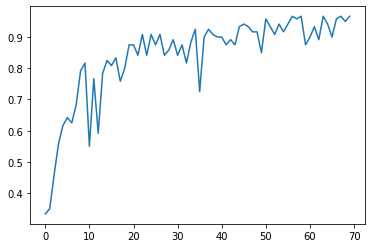

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])

Saving 183709.jpg to 183709 (2).jpg
paper


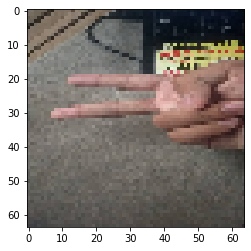

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=img_size)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=30)
  if round(classes[0][0]) == 1:
    print('paper')
  elif round(classes[0][1]) == 1:
    print('rock')
  else:
    print('scissors')

In [ ]:
train.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}